In [18]:
# Load the basic modules. Note that keras is now a part of tensorflow and to load the Keras packages, they need to be prepended with tensorflow.

In [19]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [20]:
# MNIST includes a number dataset in the keras module. We import that here and view the shape of the data in the next cell. 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [21]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [22]:
%matplotlib inline

0


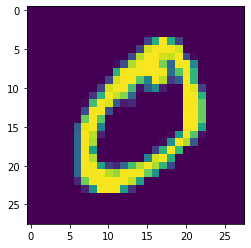

In [23]:
from matplotlib import pyplot as plt
data = train_images[1]
plt.imshow(data, interpolation='nearest')
print(train_labels[1])
plt.show()

In [24]:
# We establish our basic Neural network here. Our model is 3 layers deep, with each layer fully connected to the next layer. 
# We have one node in the first two layers for each pixel of our image data, and use the relu activation function to determine the nodes that are on. (784 is 28*28)
# The third layer has 10 nodes (one for each digit) to choose our outputs. 
# A final feature of neural networks is the compile function, which combines all of our layers with a loss funciton and a metric to determine the back propogations.
# After this cell, our network is ready to train. 

In [ ]:
network = models.Sequential()
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# We need to reshape our image data to be able to feed it into our neural network. 
# We convert from the data shape from [60000, 28, 28] to [60000, 784].
# We divide by 255 to convert from color into greyscale.

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
# Convert our label array into categorical array. 

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# We fit our model here. 
# Unlike in machine learning models, neural networks build and improve on the previous runs. We can generally increase the accuracy of our network by increasing the number of epochs. 
# Batch_size is number of training examples in a single fitting. Higher batch sizes will increase the estimate of the gradient, lower batch sizes will genreally increase run speed. 

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=64)

In [ ]:
# We can now test our network on the data it has never seen, the test set we seperated at the beginning. 
# We expect an accuracy of ~98%, which is much higher than conventional ml with a very low amount of work. 

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc, 'test_loss', test_loss)